In [1]:
import numpy as np

In [2]:
def world_to_pixel(world_coords, camera_params, rotation_matrix):
    # Extract camera parameters
    camera_position = np.array(camera_params['camera_position'])
    fov = camera_params['fov']
    width, height = camera_params['image_resolution']
    pixel_width = camera_params['camera_sensor_width'] / width
    pixel_height = camera_params['camera_sensor_height'] / height

    # Calculate the direction vector from the camera position to the 3D point
    direction = (world_coords - camera_position).astype(np.float64)

    # Normalize the direction vector
    direction /= np.linalg.norm(direction)

    # Apply the inverse rotation matrix to align with the camera's view
    inv_rotation_matrix = np.linalg.inv(rotation_matrix)
    direction = np.dot(inv_rotation_matrix, direction)

    # Project the 3D point onto the 2D image plane
    # Assuming the camera is looking along the z-axis, ignore the z-component
    u = direction[0] * fov / 2
    v = direction[1] * fov / 2

    # Convert from camera coordinates to pixel indices
    x_index = int((u / pixel_width) + width / 2)
    y_index = int((v / pixel_height) + height / 2)

    return x_index, y_index

In [3]:
# Example usage:
camera_params = {
    'fov': 49.9,  # Field of view in degrees
    'camera_position': [3, 3, 6],  # Camera position (x, y, z)
    'camera_rotation': [-25, 25, 0],  # Camera rotation in degrees (pitch, roll, yaw)
    'camera_sensor_width': 36,  # Camera sensor width in mm
    'camera_sensor_height': 24,  # Camera sensor height in mm
    'image_resolution': [320, 240]  # Image resolution (width, height)
}

# Calculate the camera rotation matrix
pitch = camera_params['camera_rotation'][0] * np.pi / 180
roll = camera_params['camera_rotation'][1] * np.pi / 180
yaw = camera_params['camera_rotation'][2] * np.pi / 180

rotation_matrix = np.array([
    [np.cos(yaw) * np.cos(pitch), np.cos(yaw) * np.sin(pitch) * np.sin(roll) - np.sin(yaw) * np.cos(roll), np.cos(yaw) * np.sin(pitch) * np.cos(roll) + np.sin(yaw) * np.sin(roll)],
    [np.sin(yaw) * np.cos(pitch), np.sin(yaw) * np.sin(pitch) * np.sin(roll) + np.cos(yaw) * np.cos(roll), np.sin(yaw) * np.sin(pitch) * np.cos(roll) - np.cos(yaw) * np.sin(roll)],
    [-np.sin(pitch), np.cos(pitch) * np.sin(roll), np.cos(pitch) * np.cos(roll)]
])

# Example 3D world coordinates
world_coords = [4, 4, 7]

# Convert 3D coordinates to 2D pixel coordinates
pixel_coords = world_to_pixel(world_coords, camera_params, rotation_matrix)
print("Pixel Coordinates:", pixel_coords)

Pixel Coordinates: (330, 279)


In [4]:
import cv2
from matplotlib.pyplot import imshow
import numpy as np

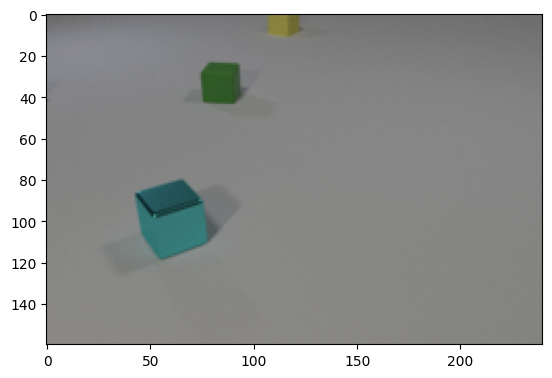

In [5]:
main_image = cv2.imread("dataset/train/video_00000/image_0.png", cv2.IMREAD_COLOR)
imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB) )

In [7]:
range_0 = np.ptp(cv2.cvtColor(main_image[90:110,50:75,:], cv2.COLOR_BGR2HSV)[:,:,0])
range_1 = np.ptp(cv2.cvtColor(main_image[90:110,50:75,:], cv2.COLOR_BGR2HSV)[:,:,1])
range_2 = np.ptp(cv2.cvtColor(main_image[90:110,50:75,:], cv2.COLOR_BGR2HSV)[:,:,2])

print("Range along dimension 0:", range_0)
print("Range along dimension 1:", range_1)
print("Range along dimension 2:", range_2)

Range along dimension 0: 6
Range along dimension 1: 66
Range along dimension 2: 108


In [8]:
# Finding the start and end values along each dimension
start_0 = main_image[90:110,50:75,:][:,:,0].min()
end_0 = main_image[90:110,50:75,:][:,:,0].max()

start_1 = main_image[90:110,50:75,:][:,:,1].min()
end_1 = main_image[90:110,50:75,:][:,:,1].max()

start_2 = main_image[90:110,50:75,:][:,:,2].min()
end_2 = main_image[90:110,50:75,:][:,:,2].max()

print("Start and End along dimension 0:", start_0, end_0)
print("Start and End along dimension 1:", start_1, end_1)
print("Start and End along dimension 2:", start_2, end_2)

Start and End along dimension 0: 41 142
Start and End along dimension 1: 38 149
Start and End along dimension 2: 9 71


In [9]:
main_image.shape

(160, 240, 3)

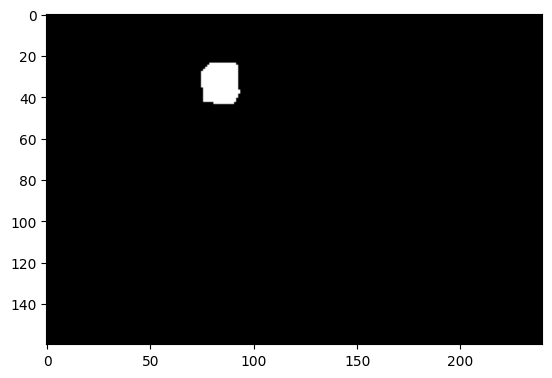

In [10]:
#Converting the BGR IMage to HSV for better colour
#selection
hsv_main_image = cv2.cvtColor(main_image,
                              cv2.COLOR_BGR2HSV)

#Stating The Range of HSV, pixel within which are needed
#to be selected and modified.
lower_colour = np.array([30, 70, 60], np.uint8)  # Lower bound of green in HSV
upper_colour = np.array([60, 255, 255], np.uint8)  # Upper bound of green in HSV

# Obtaining the mask array where these HSV values are located.
object_mask = cv2.inRange(hsv_main_image, lower_colour, upper_colour)

new_object_mask = cv2.bitwise_not(object_mask)
imshow(object_mask, cmap='gray' )

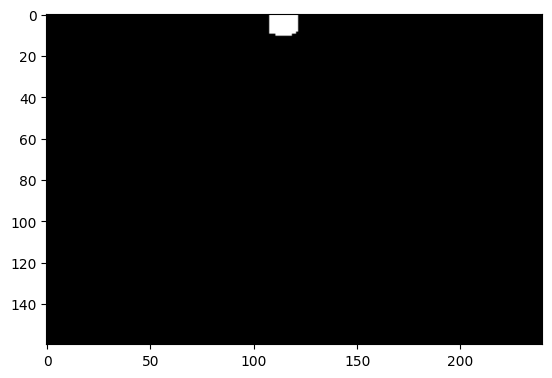

In [11]:
# Assuming the yellow cube has a bright shade, you might start with these values:
lower_yellow = np.array([25, 100, 100], np.uint8)  # Lower bound of yellow in HSV
upper_yellow = np.array([30, 255, 255], np.uint8)  # Upper bound of yellow in HSV

# Convert your main image from BGR to HSV
hsv_main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)

# Obtaining the mask array where these HSV values are located for blue and yellow.
yellow_mask = cv2.inRange(hsv_main_image, lower_yellow, upper_yellow)

yellow_object_mask = yellow_mask#cv2.bitwise_not(yellow_mask)

imshow(yellow_object_mask, cmap='gray' )

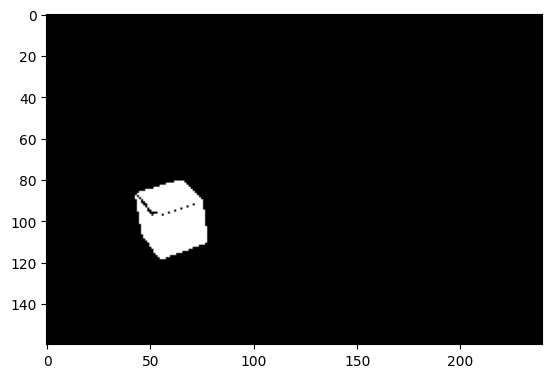

In [12]:
lower_cyan = np.array([80, 90, 60], np.uint8)  # Lower bound of cyan in HSV
upper_cyan = np.array([100, 255, 255], np.uint8)  # Upper bound of cyan in HSV

# Convert your main image from BGR to HSV
hsv_main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2HSV)

# Obtaining the mask array where these HSV values are located for blue and yellow.
cyan_mask = cv2.inRange(hsv_main_image, lower_cyan, upper_cyan)

cyan_object_mask = cyan_mask#cv2.bitwise_not(cyan_mask)
imshow(cyan_object_mask, cmap='gray' )